In [1]:
from tools import get_input
import numpy as np

data, data_test = get_input(18)
len(data), len(data_test)

(676, 14)

## Part 1

In [2]:
L = data

pos = (0, 0)
points = {pos}
corners = {}
last_dir = int(L[-1].split()[0].replace('R', '0').replace('L', '2').replace('U', '3').replace('D', '1'))

for line in L:
    dir, n, c = line.split()
    dir = int(dir.replace('R', '0').replace('L', '2').replace('U', '3').replace('D', '1'))
    corners[pos] = (last_dir, dir)
    n = int(n)
    if dir==0:       
        for i in range(1, n+1):
            pos = (pos[0], pos[1]+1)
            points.add(pos)
    elif dir==2:
        for i in range(1, n+1):
            pos = (pos[0], pos[1]-1)
            points.add(pos)
    elif dir==3:
        for i in range(1, n+1):
            pos = (pos[0]-1, pos[1])
            points.add(pos)
    elif dir==1:
        for i in range(1, n+1):
            pos = (pos[0]+1, pos[1])
            points.add(pos)
    last_dir = dir
print(len(points))

i0, j0 = int(sum([p[0] for p in points]) / len(points)), int(sum([p[1] for p in points]) / len(points))
pints = {(i0, j0)}
q = [(i0, j0)]
while q:
    i, j = q.pop()
    pints.add((i, j))
    next_pt = [(i+1, j), (i-1, j), (i, j+1), (i, j-1)]
    for p in next_pt:
        if (p not in pints) and (p not in points) and (p not in q):
            q.append(p)
print(len(pints))
print(len(points)+len(pints))

3590
42804
46394


In [3]:
S = 0
set_i = set([p[0] for p in points])
for k, i in enumerate(set_i):
    vj = np.array(sorted([p[1] for p in points if p[0]==i]))
    # true if a new segment starts at this point
    starts = np.zeros(len(vj))
    starts[0] = True
    starts[1:] = np.diff(vj)>1
    # true if a segment ends at this point
    ends = np.zeros(len(vj))
    ends[-1] = True
    ends[:-1] = np.diff(vj)>1
    within = False
    ind_start = None
    # find the indices of the starts and ends
    k_starts = np.where(starts)[0]
    k_ends = np.where(ends)[0]
    if sum(starts)!=sum(ends):
        print('errorf for i=', i, 'vj=', vj, 'starts=', starts, 'ends=', ends)
    for k1, k2 in zip(k_starts, k_ends):
        if k1==k2:
            if within:
                S += vj[k1] - ind_start + 1
            else:
                ind_start = vj[k1]
            within = not within
        elif k1<k2:
            c1 = corners[(i, vj[k1])]
            c2 = corners[(i, vj[k2])]
            turn1 = (c1[1]-c1[0]) % 4
            turn2 = (c2[1]-c2[0]) % 4
            if turn1==turn2:
                if not within:
                    S += vj[k2] - vj[k1] + 1
            else:
                if within:
                    S += vj[k2] - ind_start + 1
                else:
                    ind_start = vj[k1]
                within = not within
        else:
            print('error for i=', i, 'vj=', vj, 'starts=', starts, 'ends=', ends)
S

46394

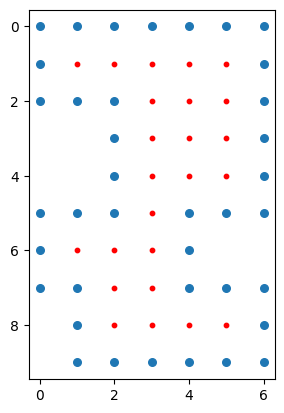

In [32]:
import matplotlib.pyplot as plt
plt.scatter([p[1] for p in points], [p[0] for p in points], s=30)
plt.scatter([p[1] for p in pints], [p[0] for p in pints], s=10, color='red')

# same scale for x and y
plt.gca().set_aspect('equal', adjustable='box')
# y axis inverted
plt.gca().invert_yaxis()

## Part 2

In [95]:
for line in data_test:
    dir, n, c = line.split()
    n = int(n)
    d = int(c[2:-2], base=16)
    dir = c[-2]
    print(c, d, dir)

(#70c710) 461937 0
(#0dc571) 56407 1
(#5713f0) 356671 0
(#d2c081) 863240 1
(#59c680) 367720 0
(#411b91) 266681 1
(#8ceee2) 577262 2
(#caa173) 829975 3
(#1b58a2) 112010 2
(#caa171) 829975 1
(#7807d2) 491645 2
(#a77fa3) 686074 3
(#015232) 5411 2
(#7a21e3) 500254 3


In [98]:
L = data_test

pos = (0, 0)
points = {pos}
corners = {}
last_dir = int(L[-1].split()[-1][-2])

for line in data_test:
    dir, n, c = line.split()
    d = int(c[2:-2], base=16)
    dir = int(c[-2])
    corners[pos] = (last_dir, dir)
    if dir==0:
        for i in range(1, d+1):
            pos = (pos[0], pos[1]+1)
            points.add(pos)
    elif dir==2:
        for i in range(1, d+1):
            pos = (pos[0], pos[1]-1)
            points.add(pos)
    elif dir==3:
        for i in range(1, d+1):
            pos = (pos[0]-1, pos[1])
            points.add(pos)
    elif dir==1:
        for i in range(1, d+1):
            pos = (pos[0]+1, pos[1])
            points.add(pos)
    last_dir = dir
print(len(points))

6405262


In [99]:
S = 0
set_i = set([p[0] for p in points])
for k, i in enumerate(set_i):
    vj = np.array(sorted([p[1] for p in points if p[0]==i]))
    # true if a new segment starts at this point
    starts = np.zeros(len(vj))
    starts[0] = True
    starts[1:] = np.diff(vj)>1
    # true if a segment ends at this point
    ends = np.zeros(len(vj))
    ends[-1] = True
    ends[:-1] = np.diff(vj)>1
    within = False
    ind_start = None
    # find the indices of the starts and ends
    k_starts = np.where(starts)[0]
    k_ends = np.where(ends)[0]
    if sum(starts)!=sum(ends):
        print('errorf for i=', i, 'vj=', vj, 'starts=', starts, 'ends=', ends)
    for k1, k2 in zip(k_starts, k_ends):
        if k1==k2:
            if within:
                S += vj[k1] - ind_start + 1
            else:
                ind_start = vj[k1]
            within = not within
        elif k1<k2:
            c1 = corners[(i, vj[k1])]
            c2 = corners[(i, vj[k2])]
            turn1 = (c1[1]-c1[0]) % 4
            turn2 = (c2[1]-c2[0]) % 4
            if turn1==turn2:
                if not within:
                    S += vj[k2] - vj[k1] + 1
            else:
                if within:
                    S += vj[k2] - ind_start + 1
                else:
                    ind_start = vj[k1]
                within = not within
        else:
            print('error for i=', i, 'vj=', vj, 'starts=', starts, 'ends=', ends)
S

: 